### Google Colab Link

https://colab.research.google.com/drive/1JkQGEvCwQ73uuCGjIv6Uc2DtDneyWOVH?usp=sharing

### Link for the Dataset

https://1drv.ms/u/c/b038f411c18753c7/EajjFBHkiDNDqLKSNs_XM48BdTi_3dAZO0bOV0XozElEUQ?e=NW5xEZ

### Installing Necessary Libraries

In [1]:
pip install opencv-python

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


### For processing the image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
import string

### For building the model

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

# Ensure TensorFlow 2.x is being used
assert tf.__version__.startswith('2.')

### Ignore all warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [4]:
df='C:/Users/Goutham/Downloads/archive (15)/train'

### Directory containing folders with images

In [5]:
root_dir = 'C:/Users/Goutham/Downloads/archive (15)/train'

### Directory to store counts for each folder

In [6]:
folder_counts = {}

### Iterate through each folder in the root directory, check if the item is a directory and count the number of image files in the folder

In [7]:
for folder in os.listdir(root_dir):
  folder_path = os.path.join(root_dir, folder)
  if os.path.isdir(folder_path):
    num_images = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name)) and name.lower().endswith(('.png', '.jpg', '.jpeg'))])
    folder_counts[folder] = num_images

### Extract folder names and corresponding counts

In [8]:
folders = list(folder_counts.keys())
counts = list(folder_counts.values())

### Plotting the bar graph

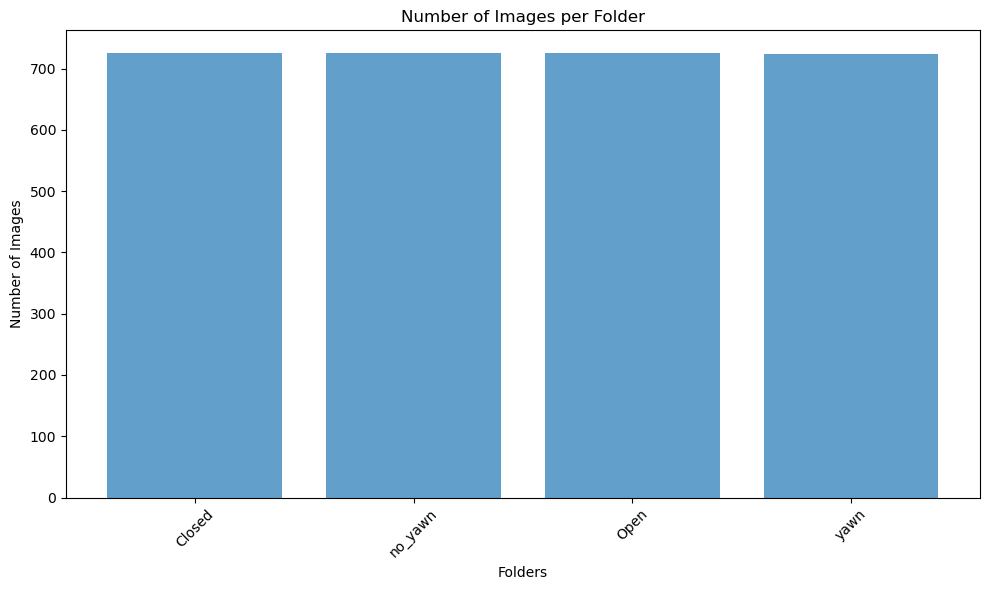

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(folders)), counts, align='center', alpha=0.7)
plt.xticks(range(len(folders)), folders, rotation=45)
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images per Folder')
plt.tight_layout()
plt.show()

In [10]:
Closed = os.listdir(os.path.join(df, 'C:/Users/Goutham/Downloads/archive (15)/train/Closed'))

Opened = os.listdir(os.path.join(df, 'C:/Users/Goutham/Downloads/archive (15)/train/Open'))

Yawn = os.listdir(os.path.join(df, 'C:/Users/Goutham/Downloads/archive (15)/train/yawn'))

No_Yawn = os.listdir(os.path.join(df, 'C:/Users/Goutham/Downloads/archive (15)/train/no_yawn'))

### holding the data

In [11]:
X=[]

### label

In [12]:
Y=[]

### Resizing and turning the images in Opened into numpy method

In [13]:
for i, image_name in enumerate(Opened):
    file_path = os.path.join(df, 'C:/Users/Goutham/Downloads/archive (15)/train/Open', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(0)

### Resizing and turning the images in Closed into numpy method

In [14]:
for i, image_name in enumerate(Closed):
    file_path = os.path.join(df, 'C:/Users/Goutham/Downloads/archive (15)/train/Closed', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(1)

### Resizing and turning the images in Yawn into numpy method

In [15]:
for i, image_name in enumerate(Yawn):
    file_path = os.path.join(df, 'C:/Users/Goutham/Downloads/archive (15)/train/yawn', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(2)

### Renaming the no_yawn file names in sequential order for convenient extraction of images

In [16]:
import os

# Path to the 'no_yawn' folder
no_yawn_folder = 'C:/Users/Goutham/Downloads/archive (15)/train/no_yawn'

# List all files in the directory
files = os.listdir(no_yawn_folder)

# Sort files to ensure consistent order
files.sort()

# First pass: Rename files to a temporary name to avoid conflicts
for i, filename in enumerate(files):
    # Define a temporary filename
    temp_filename = f"temp_{i}.jpg"
    src = os.path.join(no_yawn_folder, filename)
    dst = os.path.join(no_yawn_folder, temp_filename)
    os.rename(src, dst)

# Second pass: Rename from temporary to final sequential names
temp_files = os.listdir(no_yawn_folder)
temp_files.sort()

for i, temp_filename in enumerate(temp_files):
    # Define the final filename
    final_filename = f"{i}.jpg"
    src = os.path.join(no_yawn_folder, temp_filename)
    dst = os.path.join(no_yawn_folder, final_filename)
    os.rename(src, dst)

print(f"Renamed {len(files)} files successfully.")



Renamed 725 files successfully.


### Resizing and turning the images in No_Yawn into numpy method

In [17]:
for i, image_name in enumerate(No_Yawn):
    file_path = os.path.join(df, 'C:/Users/Goutham/Downloads/archive (15)/train/no_yawn', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(3)

### Defining the unique labels for each categories (open, closed, yawn, no_yawn)

In [18]:
labels=np.unique(Y)
print(labels)

[0 1 2 3]


In [19]:
X[1]

array([[[201, 170, 139],
        [201, 170, 143],
        [161, 130, 109],
        ...,
        [248, 209, 192],
        [248, 209, 192],
        [247, 208, 191]],

       [[210, 180, 151],
        [185, 155, 129],
        [132, 103,  82],
        ...,
        [248, 210, 192],
        [247, 209, 191],
        [247, 208, 190]],

       [[202, 172, 146],
        [148, 119,  96],
        [104,  75,  57],
        ...,
        [247, 209, 190],
        [247, 209, 190],
        [246, 208, 189]],

       ...,

       [[232, 221, 215],
        [237, 222, 213],
        [236, 213, 199],
        ...,
        [244, 193, 166],
        [246, 195, 168],
        [247, 196, 169]],

       [[232, 223, 216],
        [238, 224, 215],
        [236, 214, 200],
        ...,
        [245, 194, 167],
        [246, 195, 168],
        [247, 196, 169]],

       [[234, 225, 218],
        [239, 227, 217],
        [235, 213, 199],
        ...,
        [245, 194, 167],
        [247, 196, 169],
        [248, 197, 170]]

### X[5] is a Numpy array representing an image

In [20]:
image_array = X[5]

### Display the image

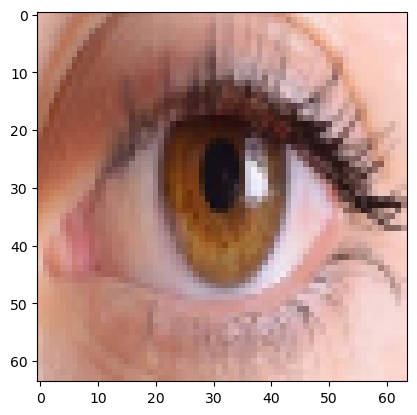

In [21]:
plt.imshow(image_array)
plt.show()

### Seeing the length of Y

In [22]:
len(Y)

2900

### Seeing the length of X

In [23]:
len(X)

2900

### Converting the list of arrays with inconsistent shapes (X and Y) into padded NumPy arrays with consistent shapes (X_array and Y_array).

In [24]:
import numpy as np

# Assuming 'X' is the list with inconsistent shapes
X_fixed = [np.array(x) for x in X]

# Find the maximum shape along each dimension
max_shape = np.max([x.shape for x in X_fixed], axis=0)

# Pad arrays to match the maximum shape
X_padded = [np.pad(x, [(0, max_shape[i] - x.shape[i]) for i in range(x.ndim)]) for x in X_fixed]

# Now try creating the NumPy array again
X_array = np.array(X_padded)

# Similarly for 'Y' if it also contains nested sequences
Y_fixed = [np.array(y) for y in Y]
# (Repeating the padding process for Y if necessary)
Y_array = np.array(Y_fixed)

print(X_array.shape)  # Check the shape of the resulting array
print(Y_array.shape)

(2900, 64, 64, 4)
(2900,)


### Using numpy.array to convert image into array for dividing dataset(X) into Training and Testing

In [25]:
X_array=np.array(X_array)
Y_array=np.array(Y_array)

### Normalizing and reshaping grayscale images from specified categories into a dataset with corresponding labels.

In [26]:
# Define the directory paths
base_dir = 'C:/Users/Goutham/Downloads/archive (15)/train'  # Adjust based on the structure

# Categories based on the folder names in the dataset
categories = ['Open', 'Closed', 'yawn', 'no_yawn']

# Image size to resize
img_size = 64

def load_and_preprocess_data(base_dir, categories, img_size):
    data = []
    labels = []
    for category in categories:
        path = os.path.join(base_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_array = cv2.resize(img_array, (img_size, img_size))
                data.append(resized_array)
                labels.append(class_num)
            except Exception as e:
                pass
    return np.array(data), np.array(labels)

data, labels = load_and_preprocess_data(base_dir, categories, img_size)

# Normalize the data
data = data / 255.0

# Reshape the data to include the channel dimension
data = data.reshape(-1, img_size, img_size, 1)

### Splitting the dataset for the model

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

### Shape of x_train & y_train

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming X_array and Y_array are defined somewhere above
X = np.array(X_array)  # Convert X_array to a NumPy array
Y = np.array(Y_array)  # Convert Y_array to a NumPy array

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)

(2320, 64, 64, 1)
(2320,)


### Shape of x_test & y_test

In [29]:
print(x_test.shape)
print(y_test.shape)

(580, 64, 64, 1)
(580,)


### CNN

### Importing the necessary libraries

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

### Defining a sequential model and building a convolutional neural network (CNN) model for multi-class image classification with layers for feature extraction, pooling, flattening, and fully connected output using the Adam optimizer and sparse categorical cross-entropy loss.

In [31]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 351,300 (1.34 MB)

 Trainable params: 351,300 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model on the training data

In [32]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.4790 - loss: 1.0351 - val_accuracy: 0.7707 - val_loss: 0.4654
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7546 - loss: 0.5216 - val_accuracy: 0.7862 - val_loss: 0.3726
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7822 - loss: 0.4032 - val_accuracy: 0.7983 - val_loss: 0.3607
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8115 - loss: 0.3931 - val_accuracy: 0.8086 - val_loss: 0.3445
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7973 - loss: 0.3798 - val_accuracy: 0.8207 - val_loss: 0.3240
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8275 - loss: 0.3420 - val_accuracy: 0.8431 - val_loss: 0.2920
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8246 - loss: 0.3453 - val_accuracy: 0.8190 - val_loss: 0.3017
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8472 - loss: 0.3064 - val_accuracy: 0.8345 - v

### Save the trained model to a file

In [33]:
model.save('Drowsiness_Detection _model_CNN.keras')

### The trained model is evaluated on the test dataset, and the loss and accuracy metrics are calculated.

In [34]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the model's performance
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Loss: 0.2918
Test Accuracy: 87.41%


### Importing the necessary libraries

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

### Convert one-hot encoded y_test back to categorical labels

In [36]:
y_test_labels = np.argmax(y_test, axis=-1)

### Get the model predictions on the test data

In [37]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


### Plotting training and validation accuracy

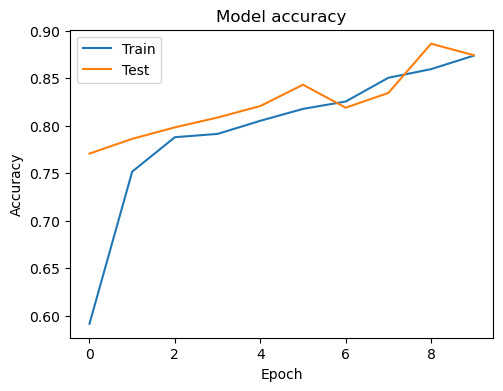

In [38]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

### Plotting training and validation loss

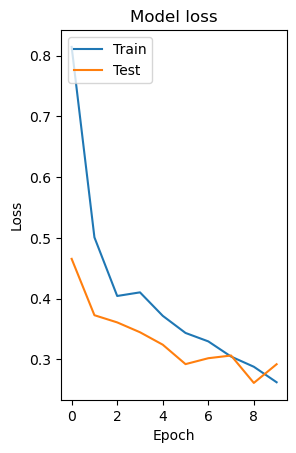

In [39]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

### Classification Report

In [40]:
# Predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Classification Report
cr = classification_report(y_test, y_pred, target_names=categories)
print("Classification Report:")
print(cr)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Classification Report:
              precision    recall  f1-score   support

        Open       0.96      0.98      0.97       151
      Closed       0.99      0.95      0.97       142
        yawn       0.76      0.84      0.80       148
     no_yawn       0.79      0.71      0.75       139

    accuracy                           0.87       580
   macro avg       0.88      0.87      0.87       580
weighted avg       0.88      0.87      0.87       580



### Confusion Matrix

In [41]:
# Predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Confusion Matrix:
[[148   1   0   2]
 [  6 135   0   1]
 [  0   0 125  23]
 [  0   0  40  99]]


### Plotting training and testing accuracy

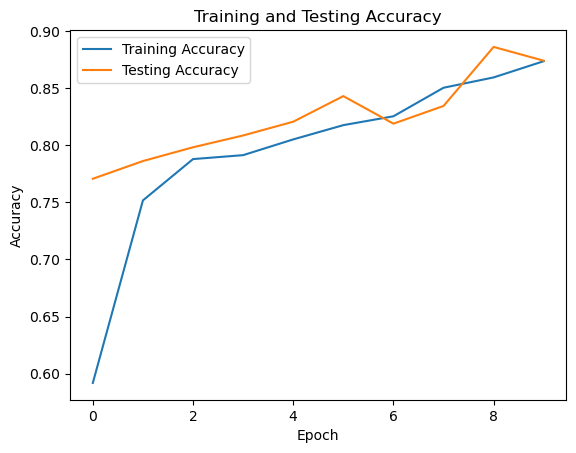

In [42]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

### Plotting training and testing loss

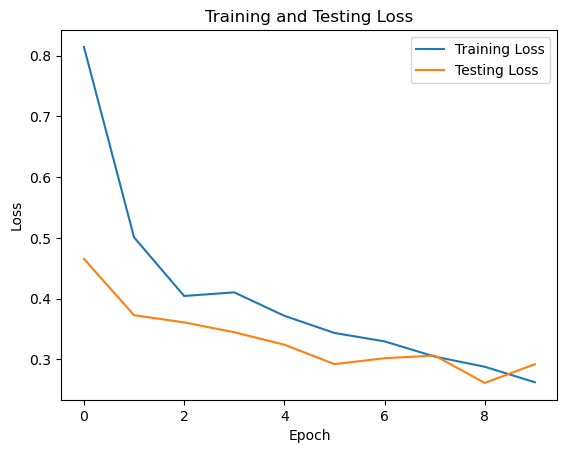

In [43]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

### Computing and plotting the confusion matrix

In [44]:
import seaborn as sns

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)

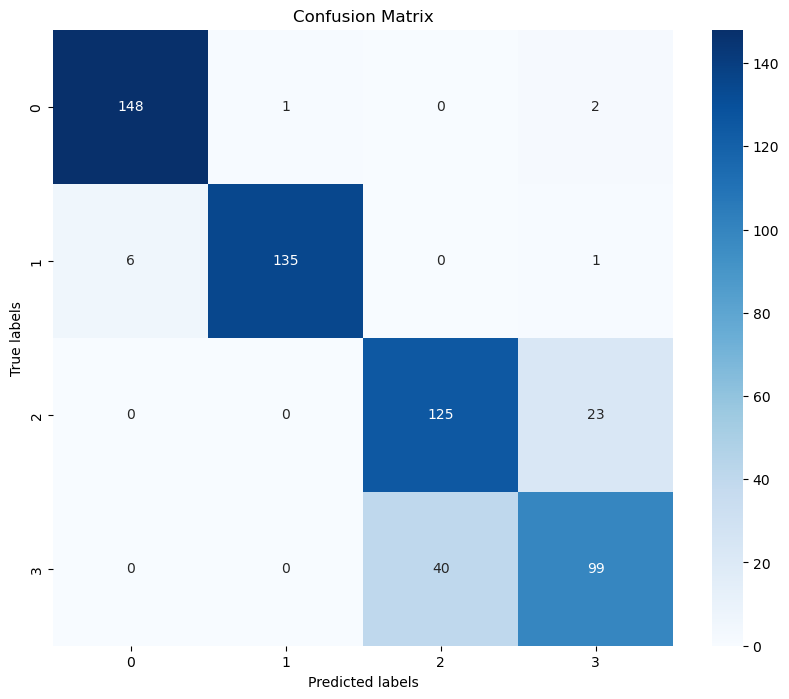

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Comparison of Actual and Predicted using CNN

### Importing the necessary libraries

In [47]:
import pandas as pd

### Load the trained model

In [48]:
model = tf.keras.models.load_model("C:/Users/Goutham/Downloads/Drowsiness_Detection _model_CNN.keras")

### Predict labels using the CNN model

In [49]:
predicted_probabilities = model.predict(X_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


### Convert the numPy array of predicted labels to a pandas Series

In [50]:
predicted_series = pd.Series(predicted_labels)

### Get value counts of actual labels

In [51]:
actual_counts = pd.Series(y_test).value_counts()

### Get value counts of predicted labels

In [52]:
predicted_counts = predicted_series.value_counts()

### Create a bar plot

In [53]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

### Define disease labels

In [54]:
disease_labels = ['Closed', 'Opened', 'Yawn', 'No_Yawn']

### Plot the actual labels and predicted labels

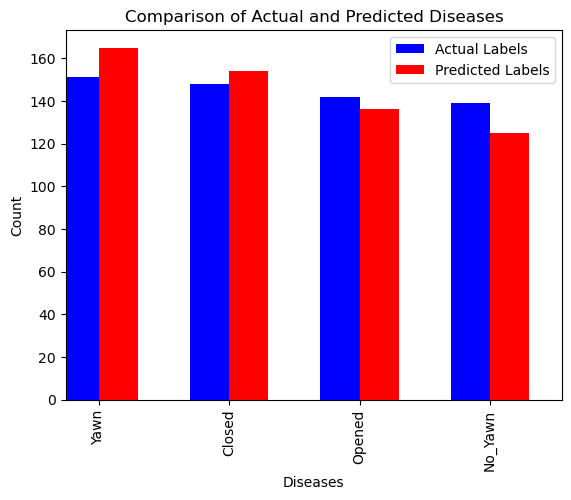

In [55]:
actual_counts.index = [disease_labels[label] for label in actual_counts.index]
actual_counts.plot(kind='bar', color='blue', width=0.3, position=1, label='Actual Labels')
predicted_counts.index = [disease_labels[label] for label in predicted_counts.index]
predicted_counts.plot(kind='bar', color='red', width=0.3, position=0, label='Predicted Labels')
plt.xlabel('Diseases')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Diseases')
plt.legend()
plt.show()

### Load the trained model and get the model's prediction for the current image and print the actual and predicted classes

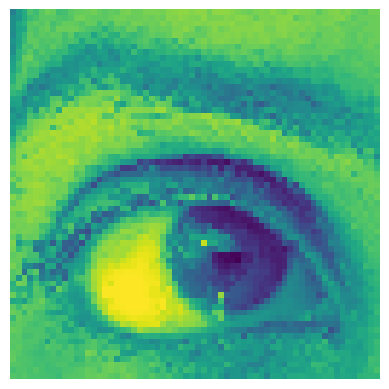

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Actual class: Opened
Predicted class: Opened


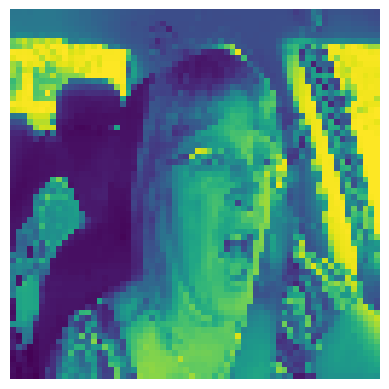

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Actual class: Opened
Predicted class: Yawn


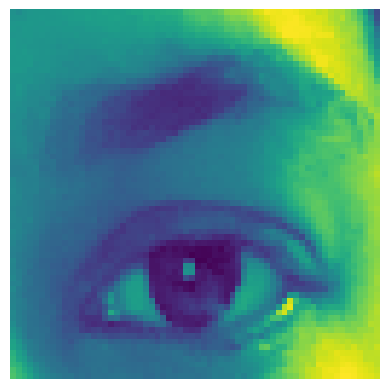

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Actual class: Opened
Predicted class: Opened


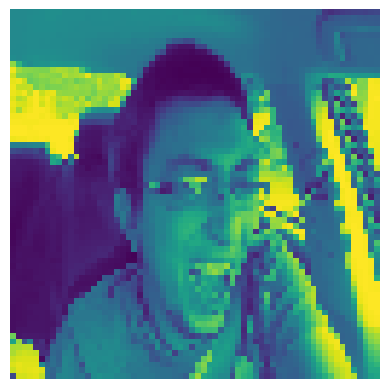

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Actual class: Opened
Predicted class: Yawn


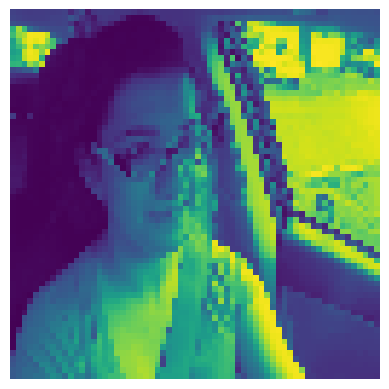

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Actual class: Opened
Predicted class: Yawn


In [56]:
# Load the trained model
model = tf.keras.models.load_model("C:/Users/Goutham/Downloads/Drowsiness_Detection _model_CNN.keras")

# Assuming x_test and y_test are your test data
for i in range(5):
    # Get the ith image and its actual label
    current_image = X_test[i]
    actual_label = y_test[i]

    # Display the image
    plt.imshow(current_image)
    plt.axis('off')
    plt.show()



    # Get the model's prediction for the current image
    batch_prediction = model.predict(np.expand_dims(current_image, axis=0))
    predicted_label = np.argmax(batch_prediction)

    # Define disease labels
    disease_labels = ['Opened', 'Closed', 'Yawn', 'No_Yawn']

    # Map predicted label to class name
    predicted_class = disease_labels[predicted_label]

    # Map actual label to class name
    actual_class = disease_labels[np.argmax(actual_label)]

    # Print actual and predicted classes
    print("Actual class:", actual_class)
    print("Predicted class:", predicted_class)

### Program for real-time detection using webcam

In [57]:
import cv2
import numpy as np
import tensorflow as tf
from playsound import playsound
import time


# # Load the model
model = tf.keras.models.load_model("C:/Users/Goutham/Downloads/Drowsiness_Detection _model_CNN.keras")

# Function to preprocess each frame
def preprocess_frame(frame, img_size):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (img_size, img_size))
    normalized = resized / 255.0
    reshaped = np.reshape(normalized, (1, img_size, img_size, 1))
    return reshaped

# Mapping from class index to class label
class_labels = {0: 'Open Eye', 1: 'Closed Eye', 2: 'Yawn', 3: 'No Yawn'}

# Start video capture
cap = cv2.VideoCapture(0)

# Variables to track drowsiness
drowsy_state = False
alarm_playing = False
alarm_file_path = "C:/Users/Goutham/Downloads/Audio file.wav"  # Path to your alarm sound file
drowsy_duration_threshold = 2  # Threshold duration in seconds for drowsiness
drowsy_start_time = None

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Preprocess the frame
    processed_frame = preprocess_frame(frame, img_size)
    
    # Predict using the model
    prediction = np.argmax(model.predict(processed_frame), axis=-1)
    
    # Display the label on the frame
    label = class_labels[int(prediction)]
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Check for drowsiness
    if label in ['Closed Eye', 'Yawn']:
        if not drowsy_state:
            drowsy_state = True
            drowsy_start_time = time.time()
        else:
            drowsy_duration = time.time() - drowsy_start_time
            if drowsy_duration >= drowsy_duration_threshold and not alarm_playing:
                playsound(alarm_file_path)
                alarm_playing = True
    else:
        drowsy_state = False
        alarm_playing = False
    
    # Show the frame
    cv2.imshow('Driver Drowsiness Detection', frame)
    
    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

In [62]:
cap.release()

In [58]:
# Function to preprocess each frame
model = tf.keras.models.load_model("C:/Users/Goutham/Downloads/Drowsiness_Detection _model_CNN.keras")
def preprocess_frame(frame, img_size):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (img_size, img_size))
    normalized = resized / 255.0
    reshaped = np.reshape(normalized, (1, img_size, img_size, 1))
    return reshaped

# Mapping from class index to class label
class_labels = {0: 'Open Eye', 1: 'Closed Eye', 2: 'Yawn', 3: 'No Yawn'}

# Start video capture
cap = cv2.VideoCapture(0)

# Variables to track drowsiness
drowsy_state = False
alarm_playing = False
alarm_file_path = "C:/Users/Goutham/Downloads/Audio file.wav"  # Path to your alarm sound file
drowsy_duration_threshold = 2  # Threshold duration in seconds for drowsiness
drowsy_start_time = None

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Preprocess the frame
    processed_frame = preprocess_frame(frame, img_size)
    
    # Predict using the model
    prediction = np.argmax(model.predict(processed_frame), axis=-1)
    
    # Display the label on the frame
    label = class_labels[int(prediction)]
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Check for drowsiness
    if label in ['Closed Eye', 'Yawn']:
        if not drowsy_state:
            drowsy_state = True
            drowsy_start_time = time.time()
        else:
            drowsy_duration = time.time() - drowsy_start_time
            if drowsy_duration >= drowsy_duration_threshold and not alarm_playing:
                playsound(alarm_file_path)
                alarm_playing = True
    else:
        drowsy_state = False
        alarm_playing = False
    
    # Show the frame
    cv2.imshow('Driver Drowsiness Detection', frame)
    
    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━